In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# 📥 Step 2: Load Dataset
df = pd.read_csv('car data.csv')  # Adjust filename if needed
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# 🧹 Step 3: Data Cleaning & Inspection
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2

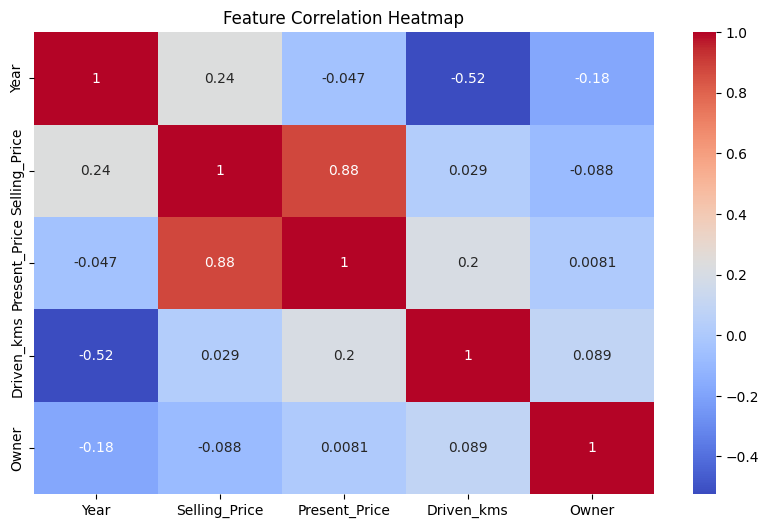

In [4]:
# 🔎 Step 4: Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
# 📊 Step 5: Categorical Data Handling
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Categorical columns: Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


In [6]:
# 🔧 Step 6: Define Features and Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🤖 Step 7: Train the Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Mean Absolute Error: 0.589304918032787
Mean Squared Error: 0.782636952131147
R² Score: 0.9660248711535068


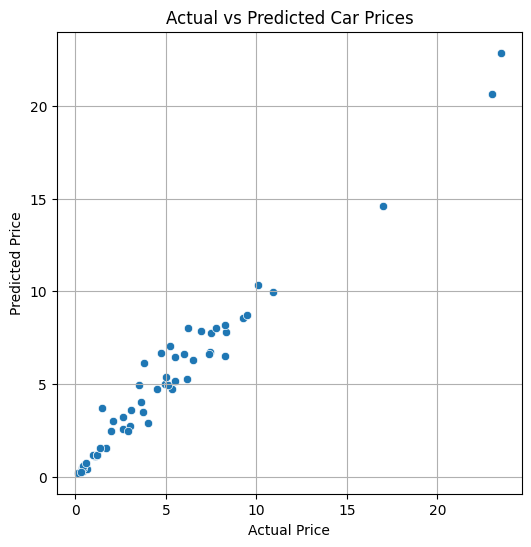

In [8]:
# 📏 Step 8: Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


In [16]:
# 🚗 Step 9: Predict Price for New Input
sample = pd.DataFrame([[2016, 6.5, 27000, 0, 0, 0, 0, 0]], columns=X.columns)

price = model.predict(sample)[0]
print(f"💰 Predicted Price for new car sample: ₹{round(price, 2)} Lakhs")

💰 Predicted Price for new car sample: ₹28.67 Lakhs
